In [40]:
# Importing my own toolbox code, where i have several scripts to automate some process
import toolbox
import pandas as pd
import numpy as np

In [41]:
raw_leads = pd.read_csv("../Data/Raw/leads.csv")
raw_offers = pd.read_csv("../Data/Raw/offers.csv")


In [42]:
raw_leads.isna().sum()

Id                            17667
First Name                     8399
Use Case                      16721
Source                         1346
Status                            0
Discarded/Nurturing Reason    16470
Acquisition Campaign          36592
Created Date                      0
Converted                         0
City                          26710
dtype: int64

In [43]:
raw_leads

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
1,NaN,Taylor1 Harris1,NaN,Inbound,Discarded,Not feeling,Event Management Guide,2018-10-17,0,Denver
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
4,NaN,Drew5 Wilson5,Corporate Events,Inbound,Nurturing,Competitor,NaN,2018-10-17,0,NaN
...,...,...,...,...,...,...,...,...,...,...
61634,lpb8obv3,NaN,Corporate Events,Outbound,New,NaN,Digital kit,2020-10-27,0,Phoenix
61635,mzcq31rg,NaN,NaN,Outbound,New,NaN,ArtFair,2020-10-27,0,NaN
61636,2ajg0z5w,NaN,Corporate Events,Outbound,New,NaN,NaN,2020-10-27,0,NaN
61637,k6wq2pi9,NaN,NaN,Outbound,New,NaN,VirtualMeetups,2020-10-27,0,Charlotte


In [44]:
raw_leads["Discarded/Nurturing Reason"].unique()

array(['Not Fit', 'Not feeling', 'Competitor', 'Not Target',
       'Not the right moment', 'Wrong Data', nan, 'Unreachable',
       'No show', 'Already Customer', 'Black list', 'Duplicate/Test',
       'Not interested', 'No Fit'], dtype=object)

In [45]:
raw_leads["Source"].unique()

array(['Inbound', 'Outbound', nan, 'Bot-Intercom', 'Mail',
       'Llamada entrante', 'Intercom'], dtype=object)

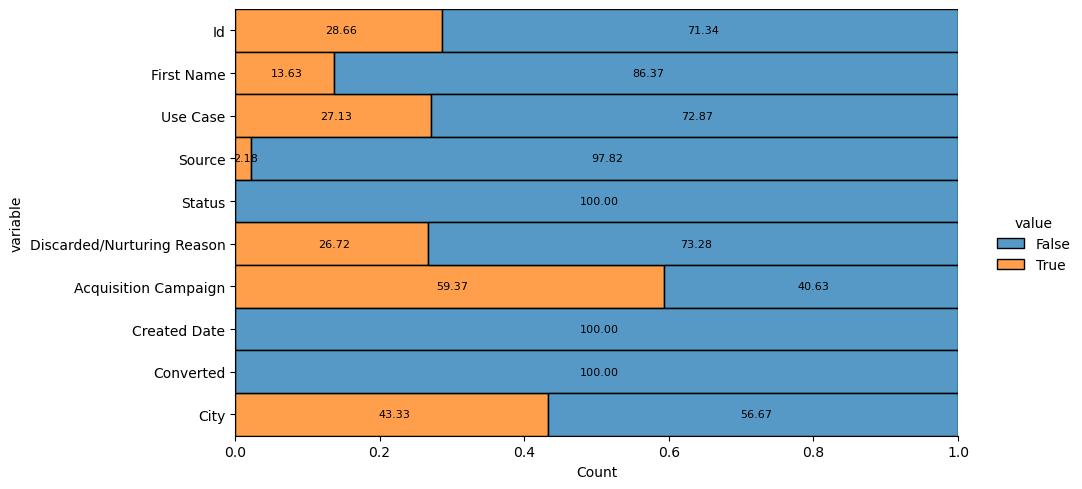

In [46]:
toolbox.null_data_proportion(raw_leads)

In [47]:
raw_offers.isna().sum()

Id               1168
Use Case           37
Status              0
Created Date        0
Close Date          0
Price             365
Discount code    1699
Pain              869
Loss Reason      3766
dtype: int64

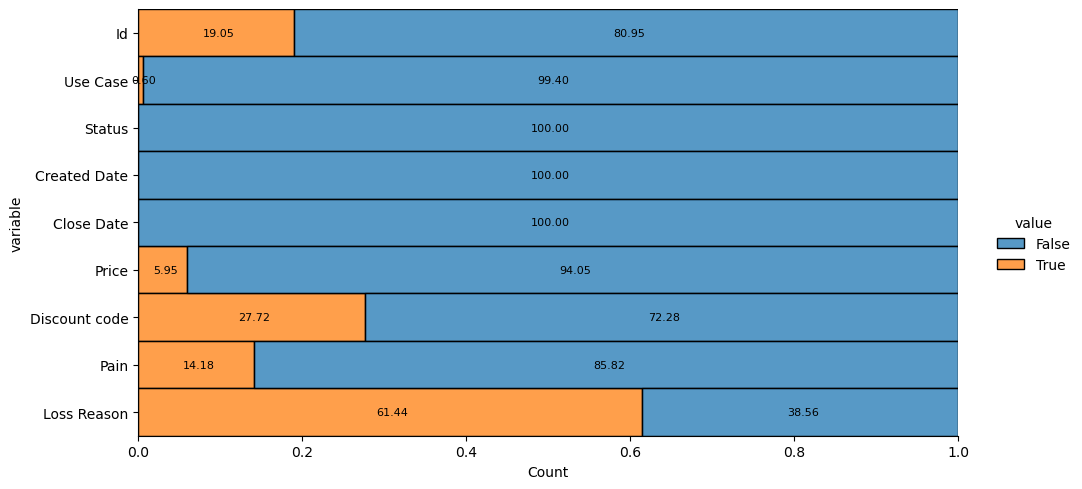

In [48]:
toolbox.null_data_proportion(raw_offers)

In [49]:
raw_offers


,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
...,...,...,...,...,...,...,...,...,...
6125,NaN,Corporate Events,Closed Lost,2019-05-20,2019-05-21,120.0,NaN,operations,price
6126,NaN,Wedding Planning,Closed Won,2019-05-20,2019-05-20,NaN,NaN,NaN,NaN
6127,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,NaN,operations,no product fit


In [50]:
# Converting string "nan" into null values sice they generated False Negatives values 
raw_leads[raw_leads["Id"] == "nan"] = np.nan
raw_offers[raw_offers["Id"] == "nan"] = np.nan

# Drop duplicated IDs
raw_offers_no_duplicates = raw_offers.copy()
raw_offers_no_duplicates["Id"] = raw_offers["Id"].drop_duplicates()

# Creating a dataframe with out null values on ID column
leads_no_ID_nan = raw_leads[raw_leads["Id"].isna() == False]
offers_no_ID_nan = raw_offers_no_duplicates[raw_offers_no_duplicates["Id"].isna() == False]

# Confirming that column has unique values
print( "Is Leads ID column Unique?: ", leads_no_ID_nan["Id"].is_unique)
print( "Is Offers ID column Unique?: ", offers_no_ID_nan["Id"].is_unique)

Is Leads ID column Unique?:  True
Is Offers ID column Unique?:  True


In [51]:
# Creating copies of dataframes to avoid warning messages
leads_no_ID_nan = leads_no_ID_nan.copy()
offers_no_ID_nan = offers_no_ID_nan.copy()

# Making the IDs strings to merge
leads_no_ID_nan.loc[:, "Id"] = leads_no_ID_nan["Id"].astype("str")
offers_no_ID_nan.loc[:, "Id"] = offers_no_ID_nan["Id"].astype("str")

# Merging the Dataframes
merged_df = pd.merge(leads_no_ID_nan, offers_no_ID_nan, how='left', on="Id",)

# Checking the dataframes sizes
print("leads: " + str(leads_no_ID_nan.shape) + "\noffers: " + str(offers_no_ID_nan.shape) + "\nmerged: " + str(merged_df.shape))

leads: (43972, 10)
offers: (4924, 9)
merged: (43972, 18)


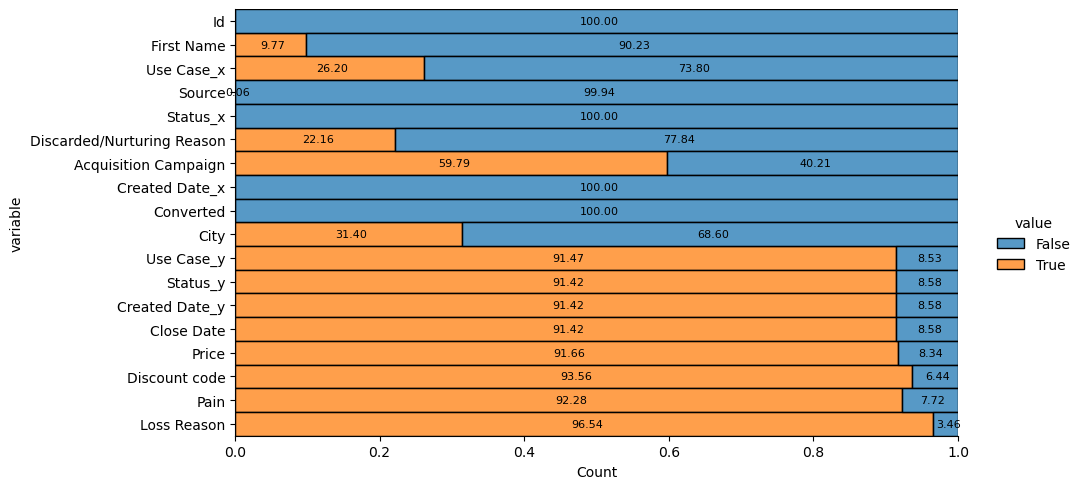

In [52]:
# Checking null data on new dataframe
toolbox.null_data_proportion(merged_df)

In [53]:
# Filling the null nada with a new category (Not_specified) 
merged_df.fillna("Not_Specified", inplace=True)
leads_no_ID_nan.fillna("Not_Specified", inplace=True)
offers_no_ID_nan.fillna("Not_Specified", inplace=True)

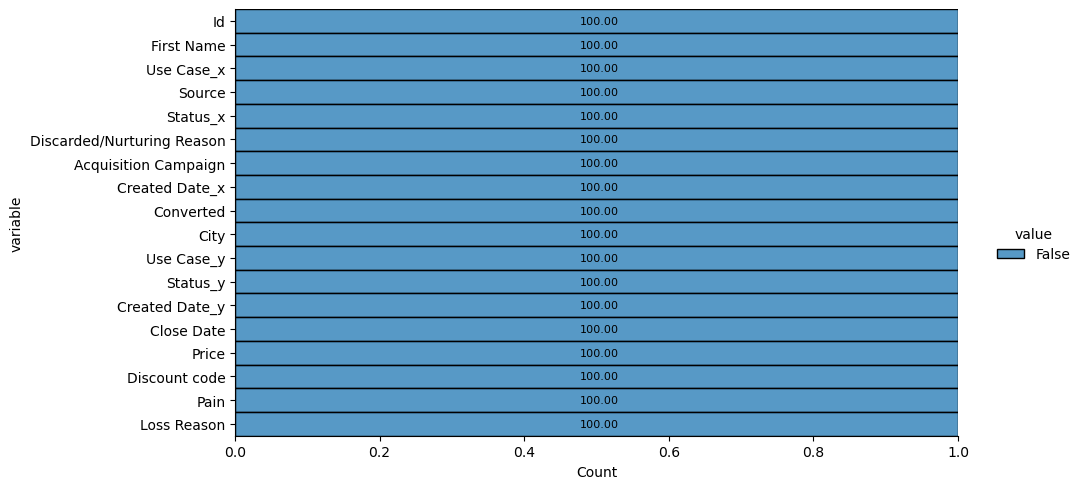

In [54]:
toolbox.null_data_proportion(merged_df)

In [55]:
merged_df.to_csv("../Data/Processed/merged.csv", index=False)
leads_no_ID_nan.to_csv("../Data/Processed/leads.csv", index=False)
offers_no_ID_nan.to_csv("../Data/Processed/offers.csv", index=False)

In [67]:
raw_offers[(raw_offers["Id"].isna() == False) & (raw_offers["Id"].duplicated(keep=False))].sort_values("Id")

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
5705,3npqoa77,Corporate Events,Closed Lost,2019-06-15,2019-06-16,360.0,NOCOSTREG,financial control,no product fit
2401,3npqoa77,Educational Seminars,Closed Lost,2019-07-24,2019-07-24,0.0,NOCOSTREG,NaN,no response
741,4m6zavsg,Sports Events,Closed Won,2020-01-27,2020-01-27,600.0,PROMOCODE,NaN,NaN
3340,4m6zavsg,Sports Events,Closed Won,2018-11-11,2018-11-11,450.0,PROMOCODE,operations,NaN
5030,85hvce1u,Corporate Events,Closed Won,2019-03-26,2019-03-30,768.0,2SEMESTERS20OFF,quality of delivery,NaN
...,...,...,...,...,...,...,...,...,...
1442,z52nyf59,Corporate Events,Closed Lost,2018-10-01,2018-06-09,200.0,2SEMESTERS20OFF,operations,other
4863,zffapz33,Corporate Events,Closed Won,2018-09-10,2018-09-10,960.0,ANNUAL60DEAL,quality of delivery,NaN
1108,zffapz33,Sports Events,Closed Won,2018-06-24,2018-06-25,960.0,ANNUAL60DEAL,operations,NaN
2128,zptwoiyk,Educational Seminars,Closed Won,2019-07-23,2019-07-23,0.0,NOCOSTREG,NaN,NaN
